# Import libraries and load data

In [1]:
import pandas as pd #analysis
import numpy as np #math
import scipy.stats as stats #stat tests

import matplotlib.pyplot as plt #visuals
import seaborn as sns #visuals

In [2]:
#load data
control = pd.read_csv('data/control_group.csv', sep=';')
test = pd.read_csv('data/test_group.csv', sep=';')

In [3]:
#look at ddata sample
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#look at data sample for test group
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


Every table corresponds to a 30 day window with the measurements for that day. 

Might be worthwhile to look at time series for each feature 

# Functions

In [16]:
#function to plot histograms
def make_histograms(dataframe, num_rows, num_cols, figsize, Test=False):
    features = list(dataframe.select_dtypes([int, float]).columns)
    figure, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            feature = features[idx]
            axs[i, j].hist(dataframe[feature])
            axs[i, j].set_title(feature)
    if Test == True:
        plt.suptitle(f'Test Group Histograms')
    else:
        plt.suptitle(f'Control Group Histograms')
    plt.show()



#function to plot boxplots
def make_boxplots(dataframe, num_rows, num_cols, figsize, Test=False):
    features = list(dataframe.select_dtypes([int, float]).columns)
    figure, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            feature = features[idx]
            axs[i, j].boxplot(dataframe[feature])
            axs[i, j].set_title(feature)
    if Test == True:
        plt.suptitle(f'Test Group Histograms')
    else:
        plt.suptitle(f'Control Group Histograms')
    plt.show()


# EDA

## Data Overview - both groups

In [5]:
#info for control group
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [6]:
#info for test group
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [7]:
# Check duplicates for Control group
control.duplicated().sum()

0

In [8]:
# Check duplicates for Test group
test.duplicated().sum()

0

Summary:
- 30 instances each
- Control group has 1 null - could drop it or use median imputation; likely median
- Date will need to be converted to Datetime; other dtypes are correct.
- no duplicates either

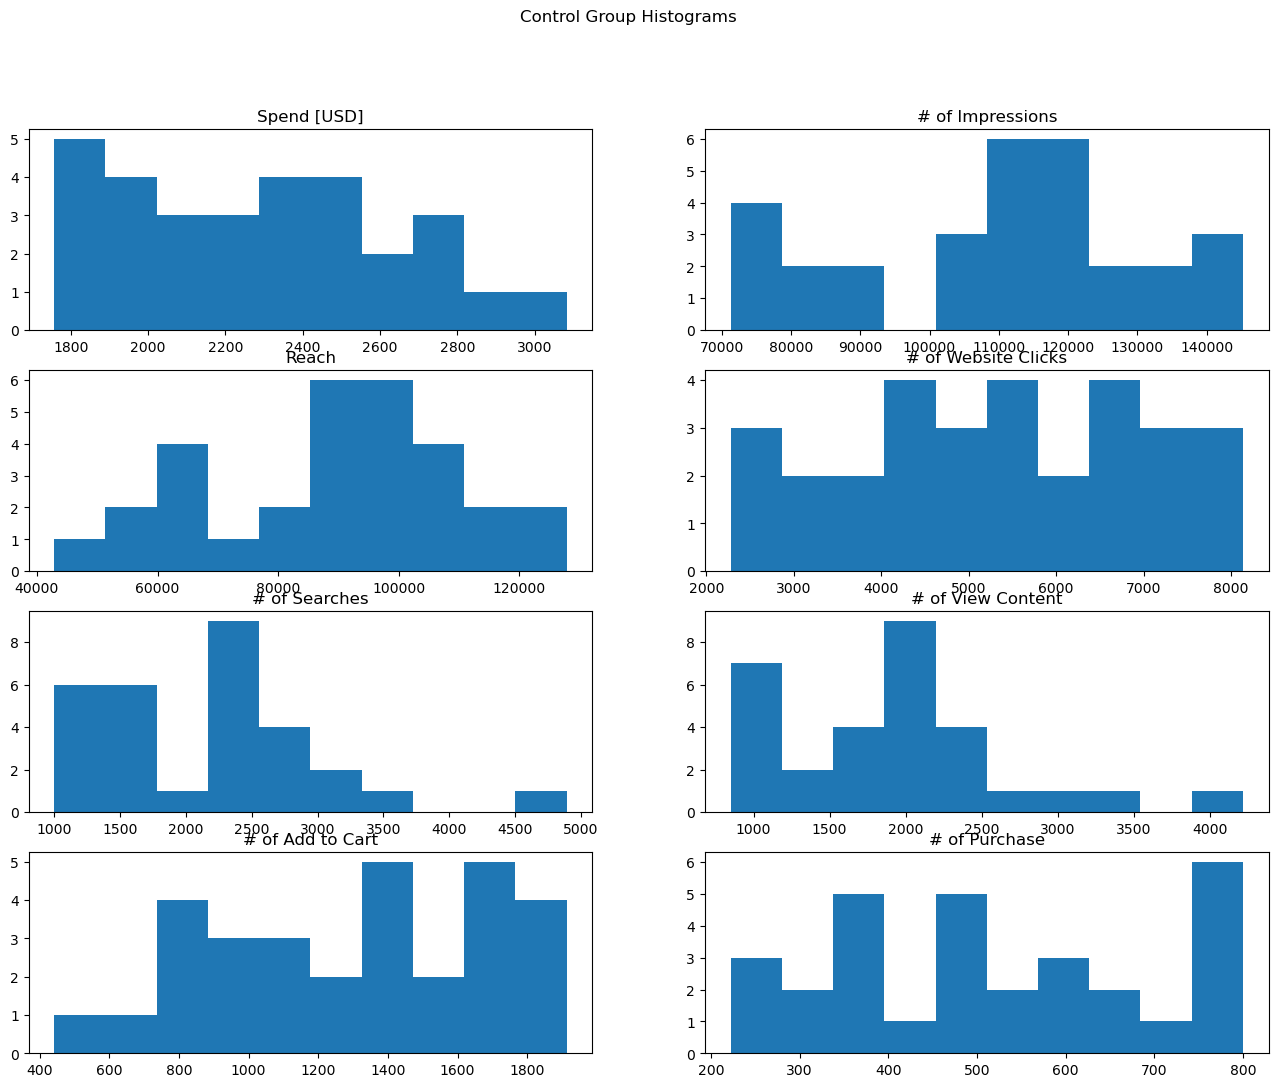

In [17]:
#get distribution to determine optimal imputation method
make_histograms(control, 4, 2, (16, 12), Test=False)

In [9]:
#impute median for nulls in Control group 
null_features = ['# of Impressions', 'Reach', '# of Website Clicks',
         '# of Searches', '# of View Content', '# of Add to Cart',
         '# of Purchase']

control[null_features] = control[null_features].fillna(control[null_features].median()) #Median used because it is more robust than mean

#check work
control.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

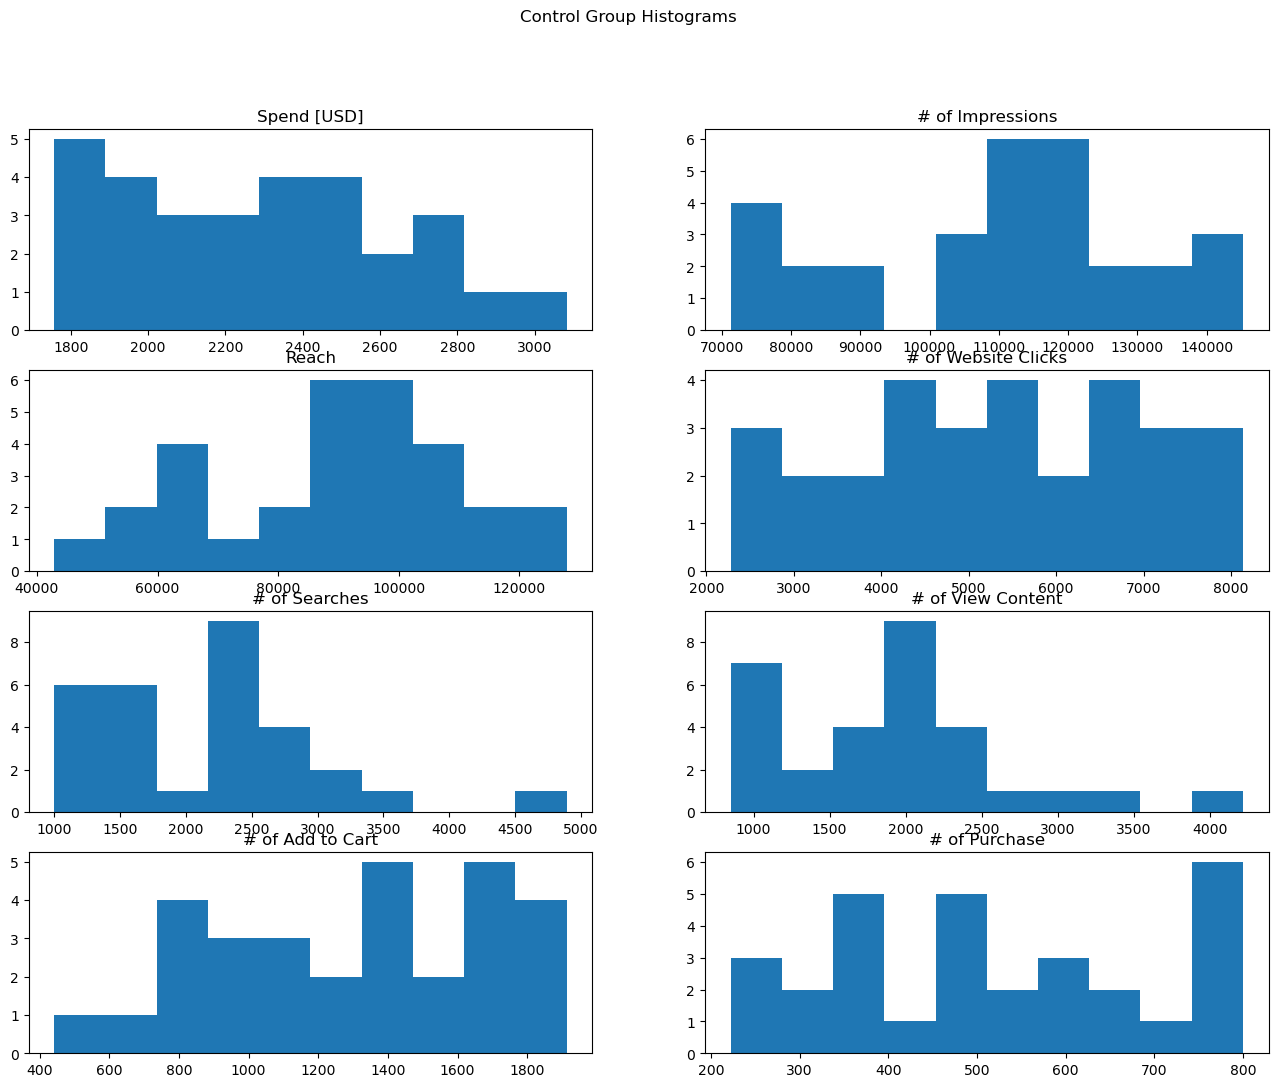

In [18]:
#check histograms again to see if substantial difference
make_histograms(control, 4, 2, (16, 12), Test=False)

No major changes with Median Imputation

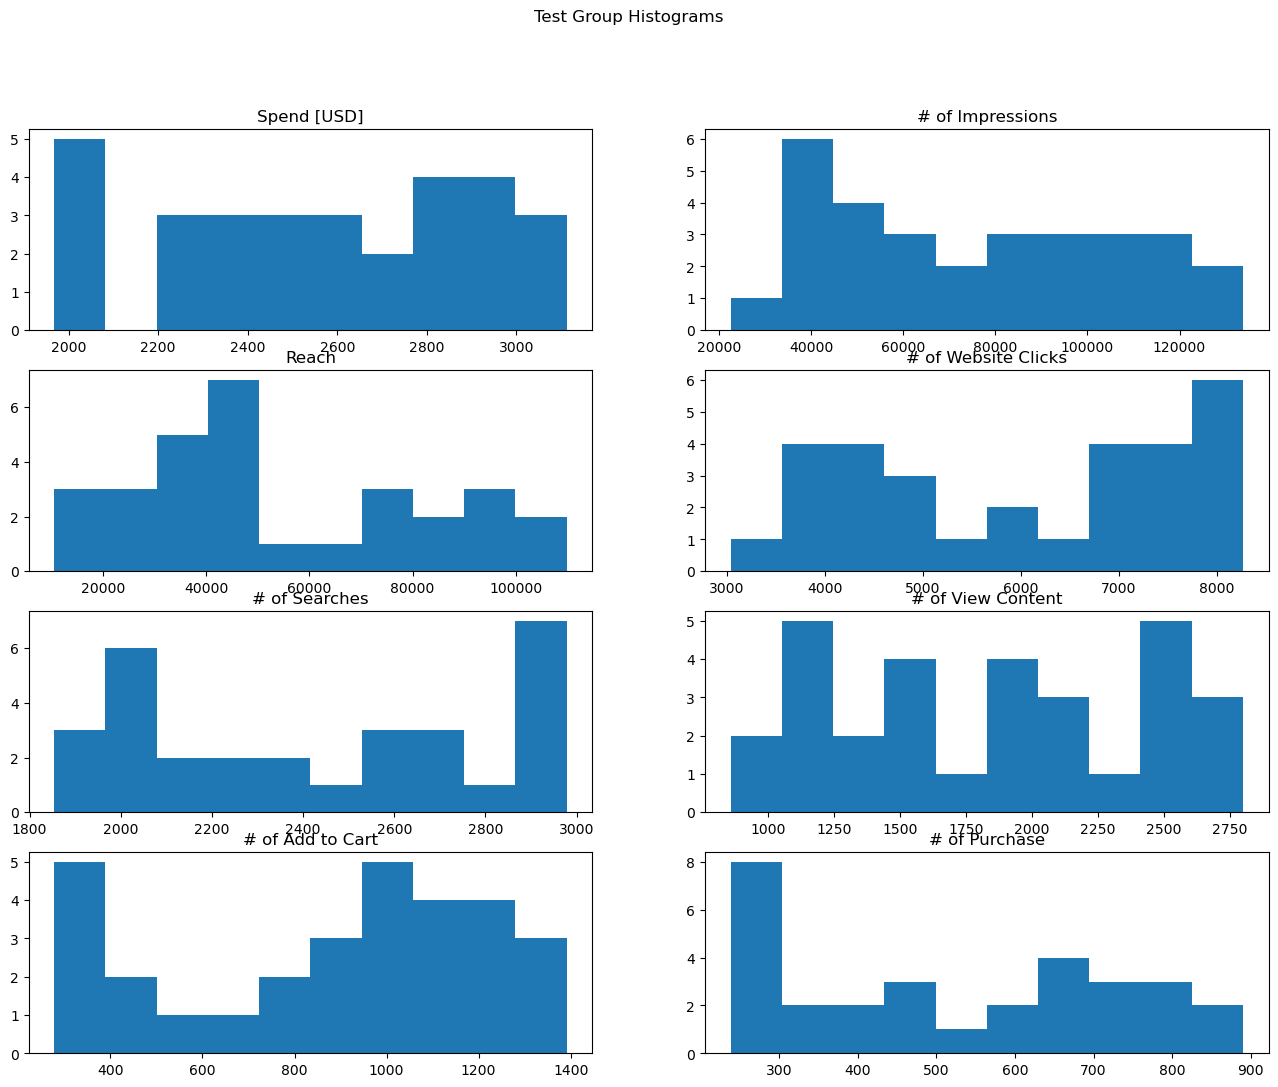

In [19]:
#histograms for Test group
make_histograms(test, 4, 2, (16, 12), Test=True)

Very different distribution compared to the Control group...

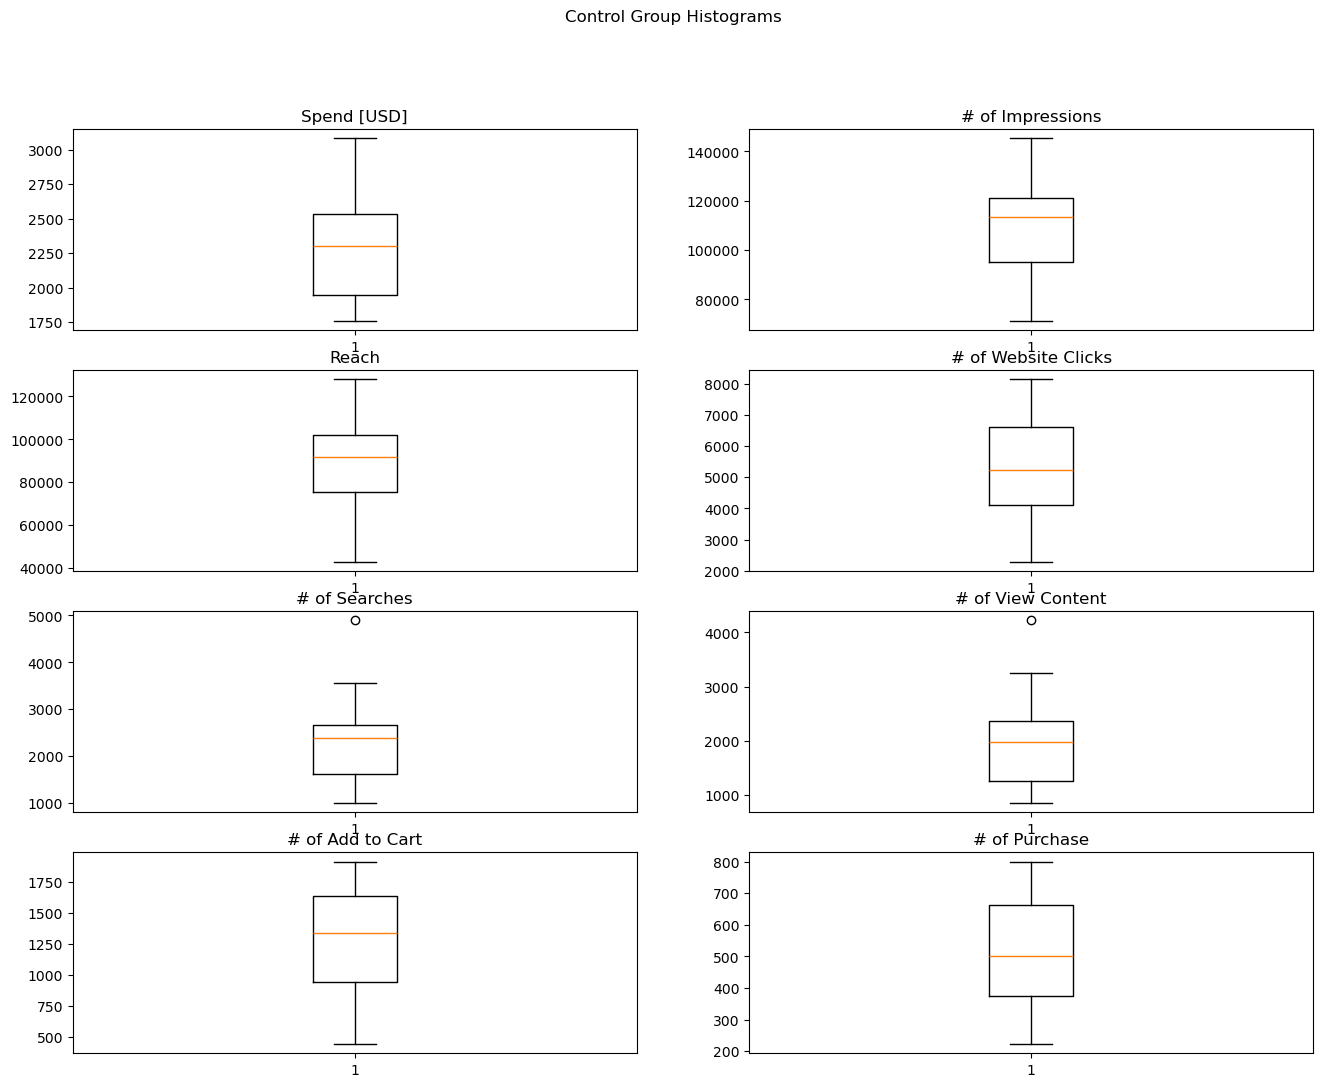

In [20]:
#boxplots for control group
make_boxplots(control, 4, 2, (16, 12), Test=False)

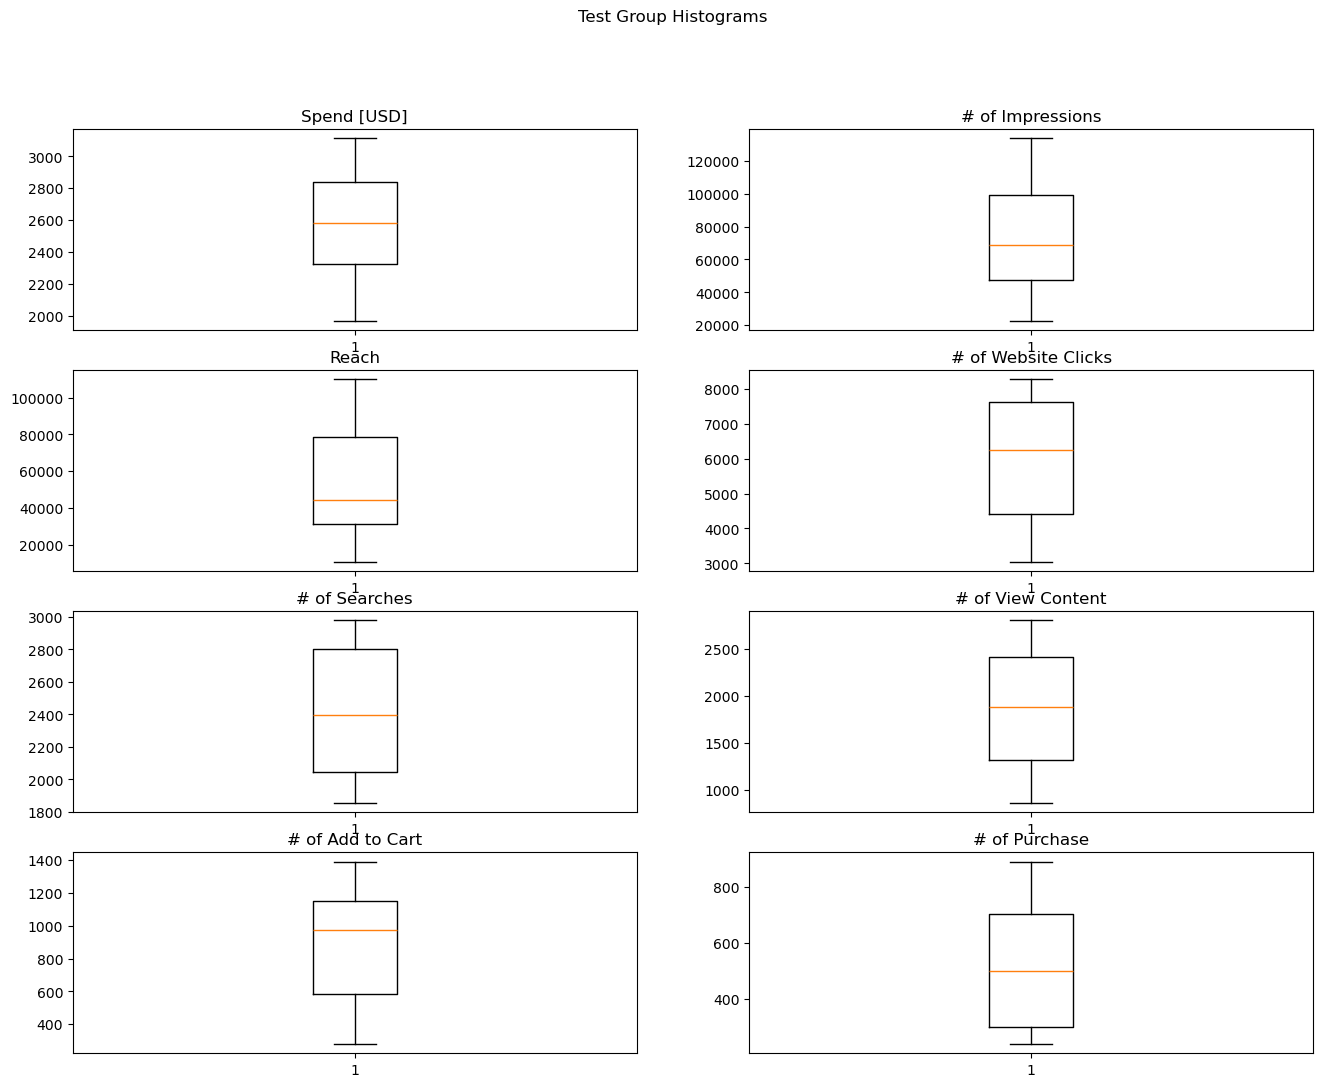

In [21]:
#boxplots for test group
make_boxplots(test, 4, 2, (16, 12), Test=True)

no outliers, but confirmation the spread is different.

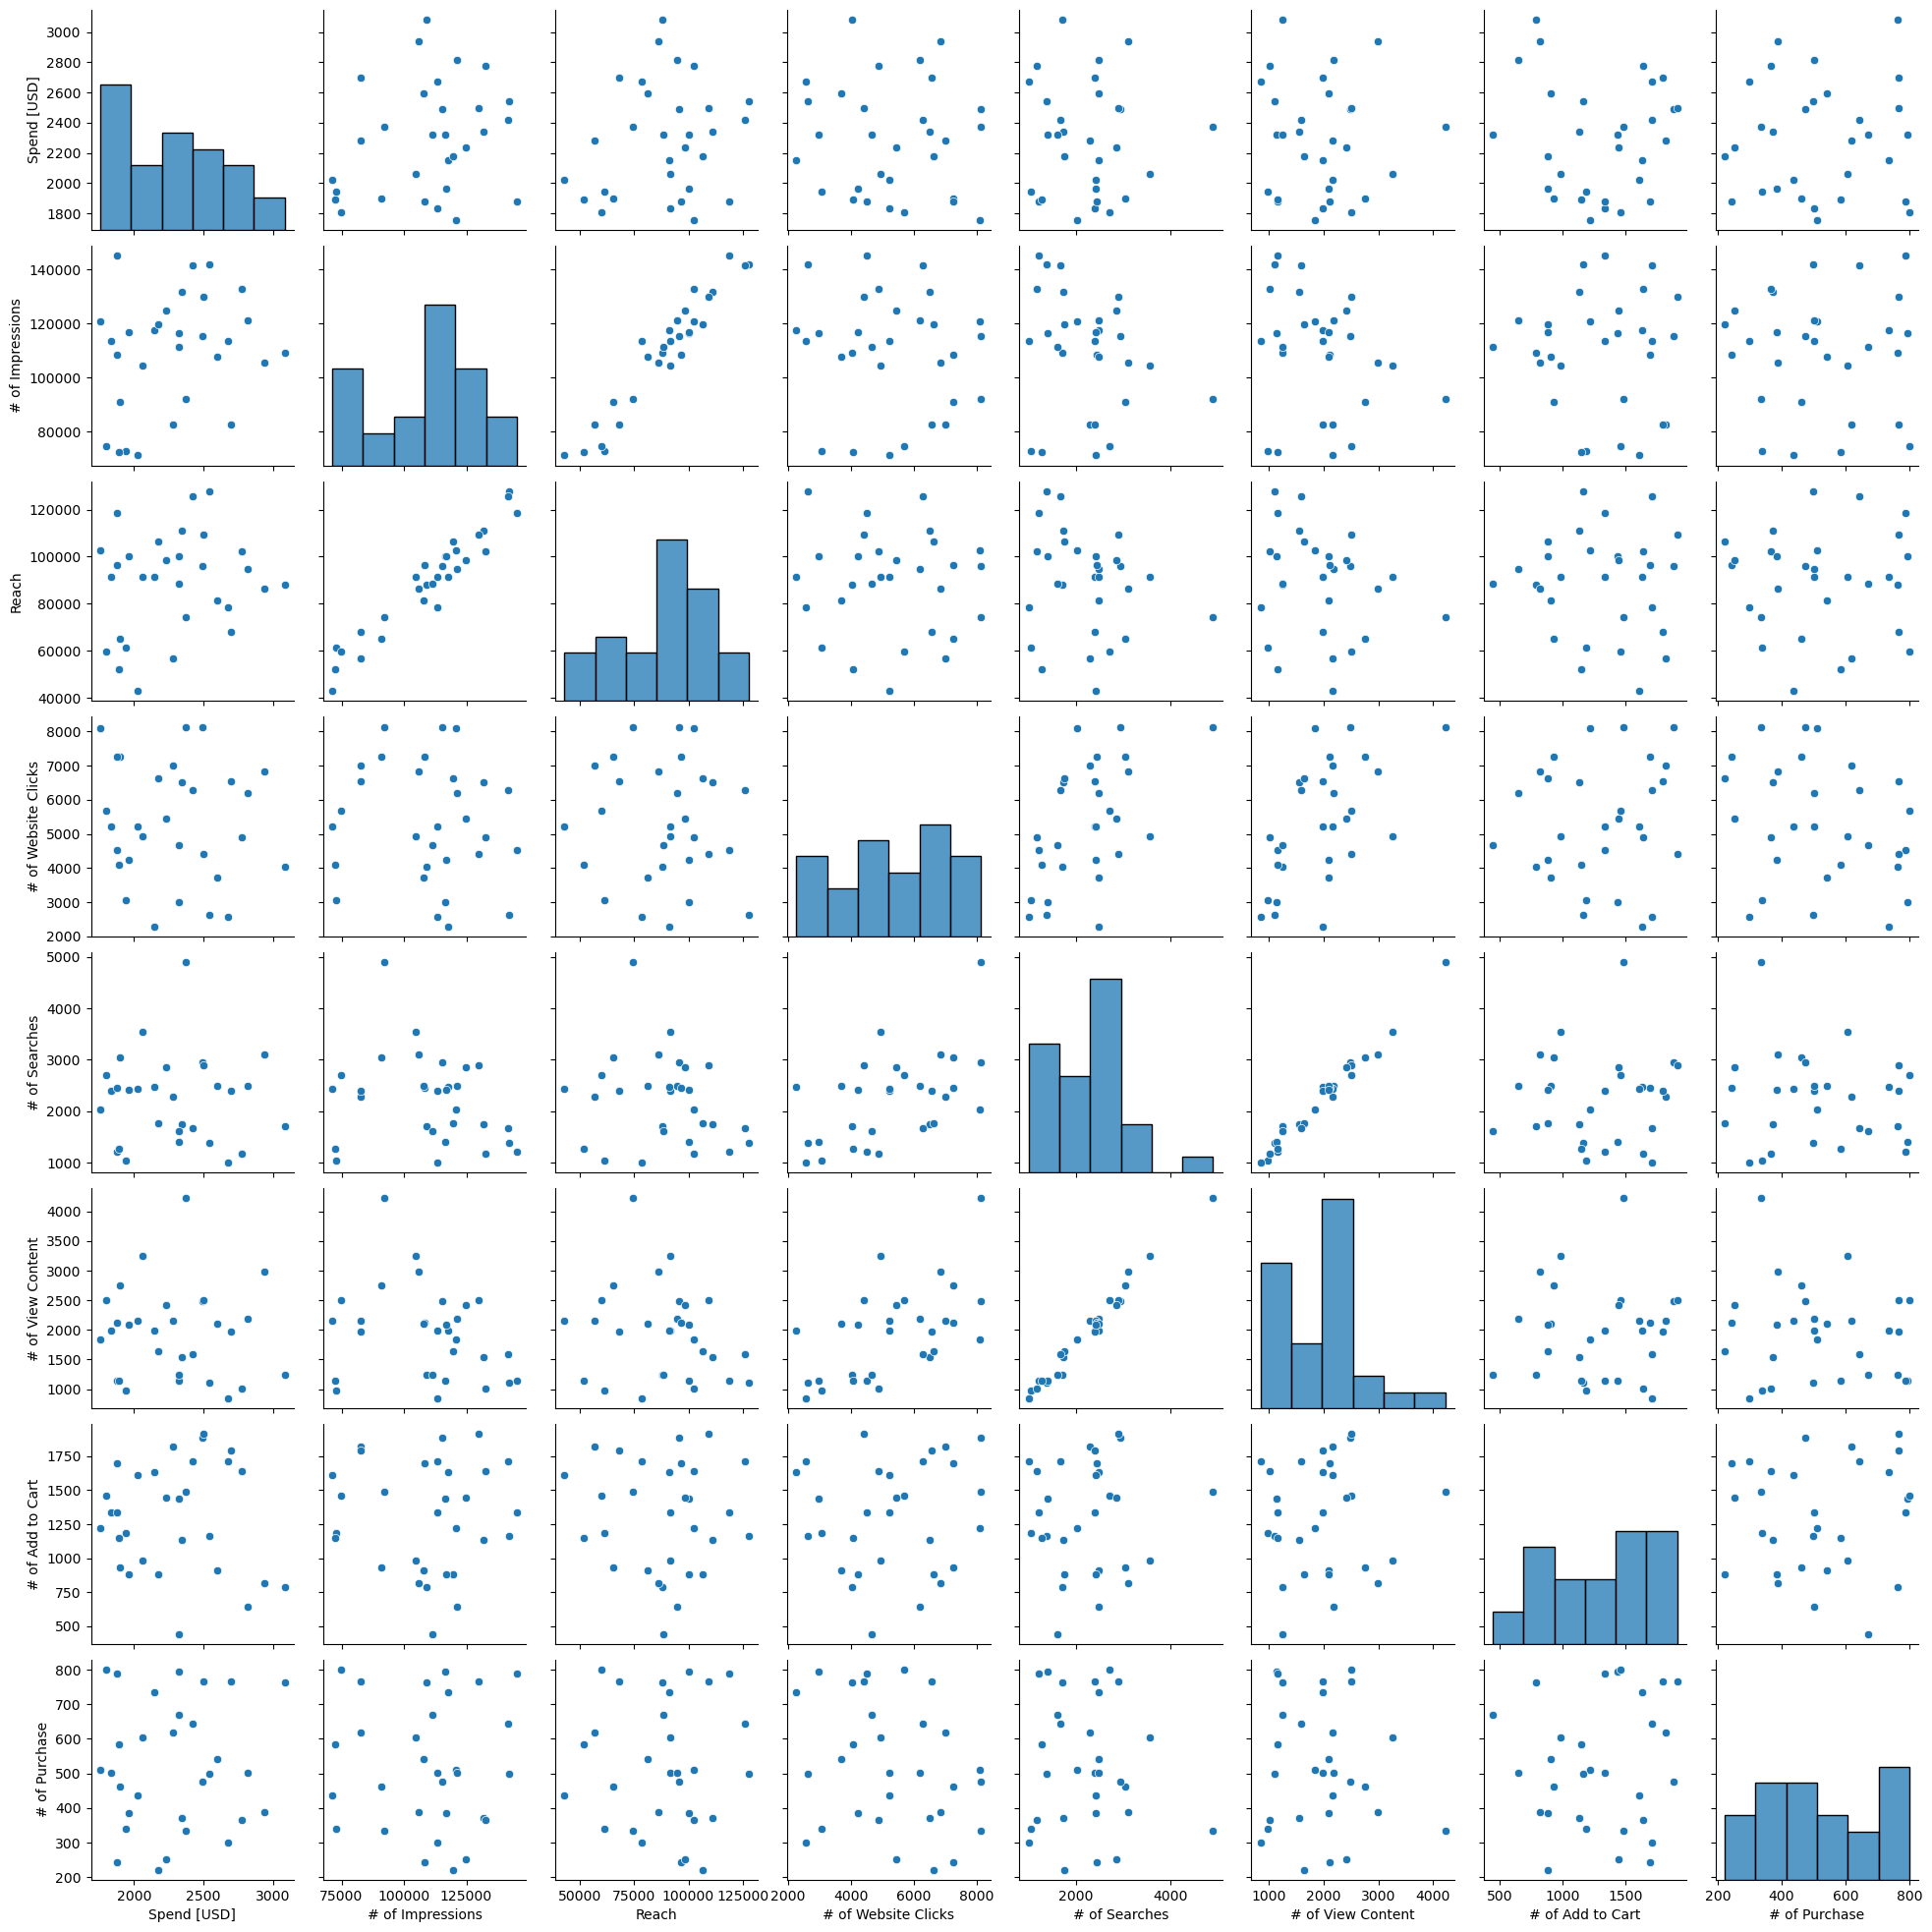

In [22]:
#pairplot of control group
sns.pairplot(control)
plt.show()

- Linear relations between Reach and # of Impressions regardless of axis
- Linear Relation between # of View Content and # of Searches regardless of axis
- Somewhat linear relation between # website clicks and # of seaches and # view content

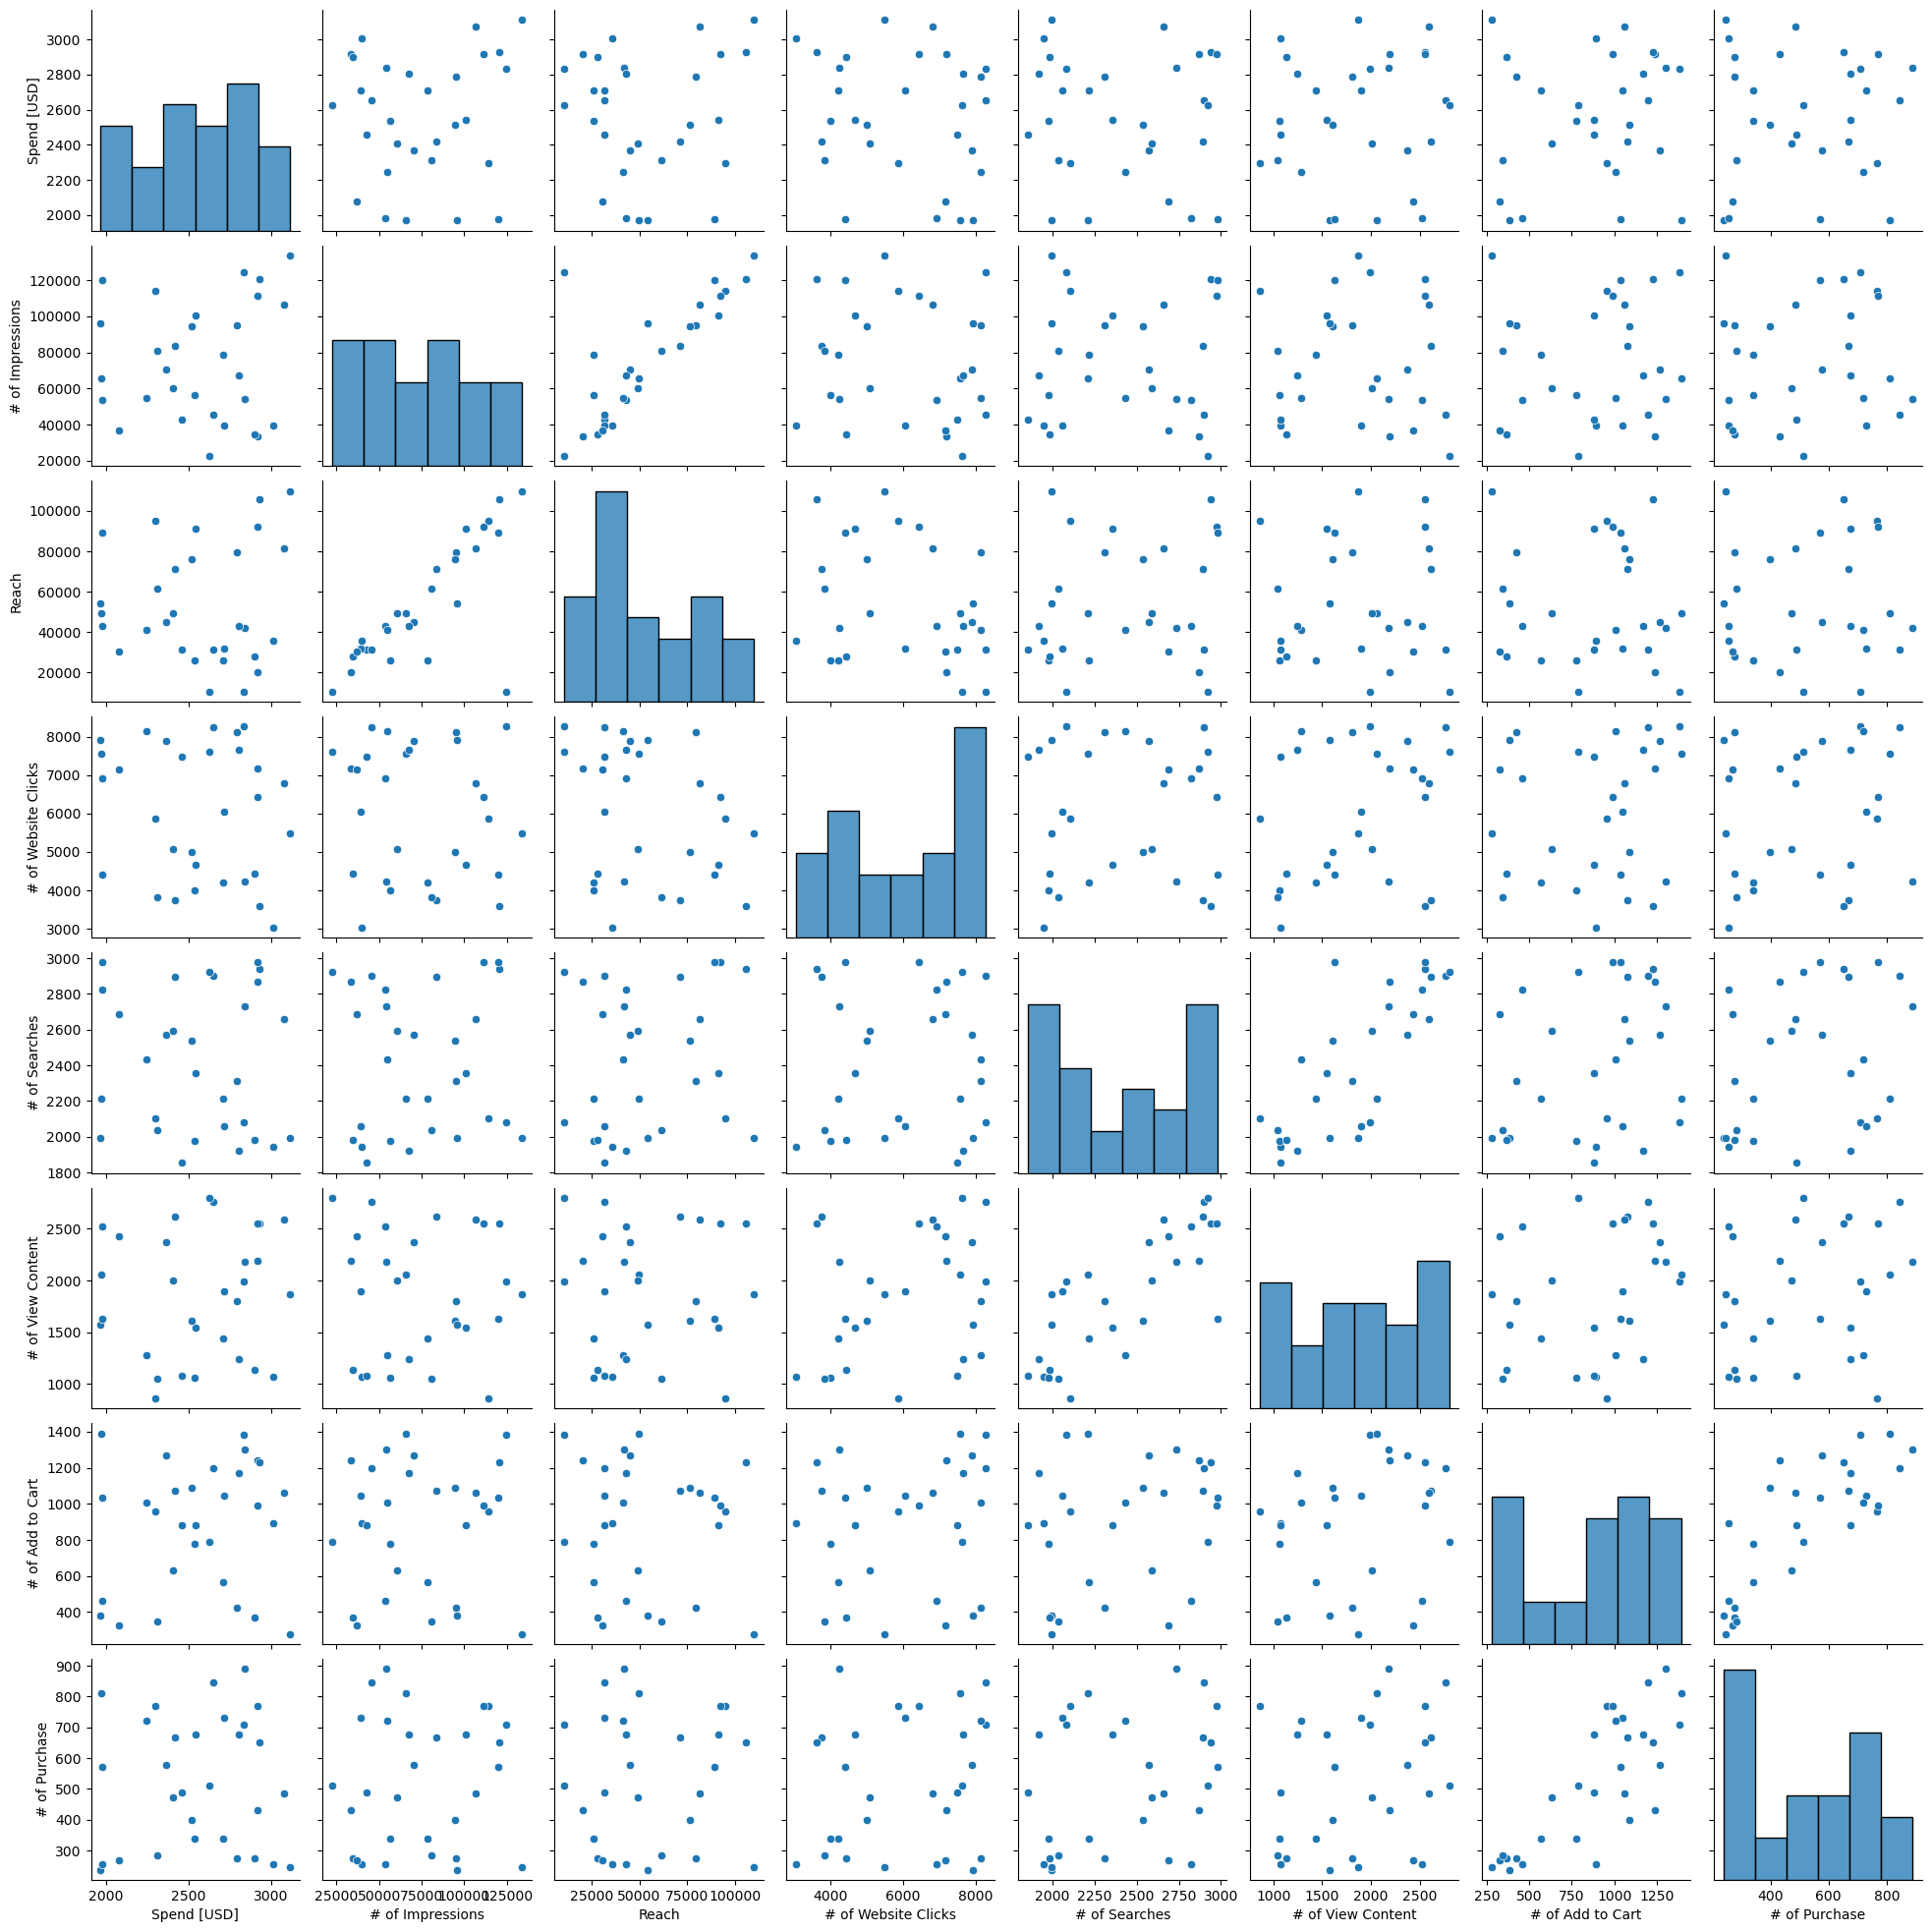

In [23]:
#pair plot of test group
sns.pairplot(test)
plt.show()

- Linear relations between Reach and # of Impressions regardless of axis
- Linear Relation between # of View Content and # of Searches regardless of axis **This is no longer True in the Test Group**
- Somewhat linear relation between # website clicks and # of seaches and # view content
- Num of Purchase and # add to cart are linear

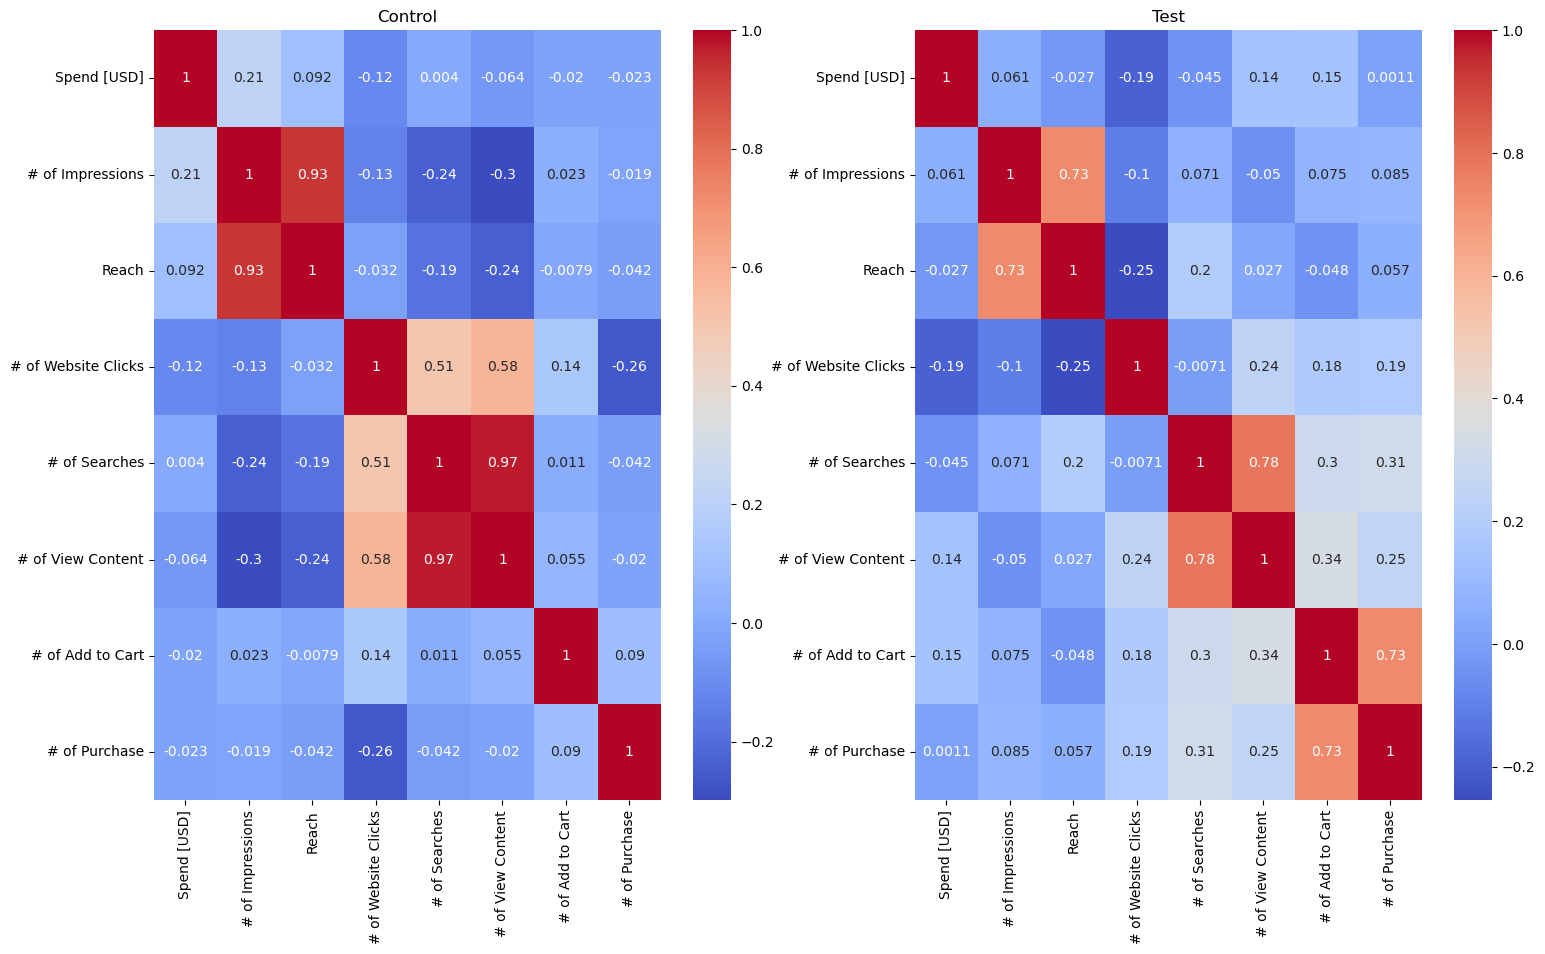

In [29]:
#heat maps for Control and test group
figure, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

#correlation - use Spearman because non-normal
control_corr = control.drop(['Campaign Name', 'Date'], axis=1).corr('spearman')
test_corr = test.drop(['Campaign Name', 'Date'], axis=1).corr('spearman')

#plot heatmaps
sns.heatmap(control_corr, annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title('Control')

sns.heatmap(test_corr, annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title('Test')

plt.show()

Control Group Observations:
- Spend[USD]: Impressions 0.12; Website Click -0.12
- Impressions: Reach 0.93; Clicks -0.13; Seaches -0.24; Views -0.3
- Reach: Searches -0.19; Views -0.24
- Website Clicks: Searches 0.51; Views 0.58; Add to cart 0.14; Puchase -0.26
- Searches: Views 0.97
- Views: 
- Add to Cart: Purchase 0.09

Test Group Observations:
- Spend[USD]: Clicks -0.19; views 0.14; Add to Cart 0.15
- Impressions: Reach 0.73; Clicks -0.1
- Reach: Click -0.25; Searches 0.2
- Clicks: Views 0.24; Add to Cart 0.18; Purchase 0.19
- Searches: Views 0.78; Add to cart 0.3; Purchase 0.31
- View: Add to cart 0.34; Purchase 0.25
- Add to cart: 0.73

I don't know what some of these things mean, so let's get some definitions:
- Impressions = visibility
- Reach - Unique individuals exposed
- Website clicks - times something is clicked
- Searches - on your site for product
- View content - times people viewed it


In [10]:
#let's look at time series for the different metrics over the course of 30 days

#change Date to Datetime
control['Date'] = pd.to_datetime(control['Date'], format='%d.%m.%Y')
test['Date'] = pd.to_datetime(test['Date'], format='%d.%m.%Y')

#create copies and combine
control_copy = control.copy()
test_copy = test.copy()
joined_df = pd.concat([control_copy, test_copy], axis=0)

joined_df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,2019-08-05,1835,113430.0,91579.0,5224.0,2390.0,1984.0,1339.0,501.0
5,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,2019-08-07,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,2019-08-08,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,2019-08-09,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,2019-08-10,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [20]:
joined_df.groupby('Campaign Name')['Spend [USD]'].mean().index

Index(['Control Campaign', 'Test Campaign'], dtype='object', name='Campaign Name')

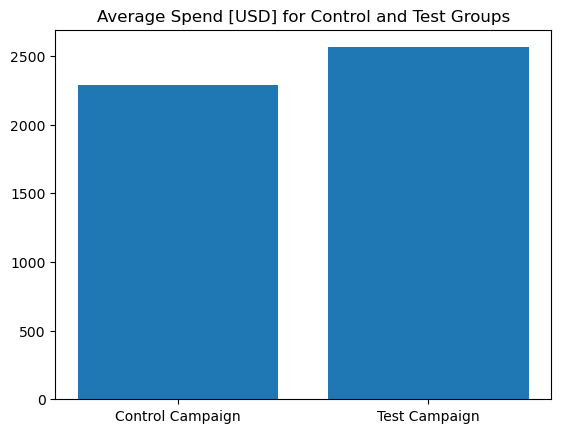

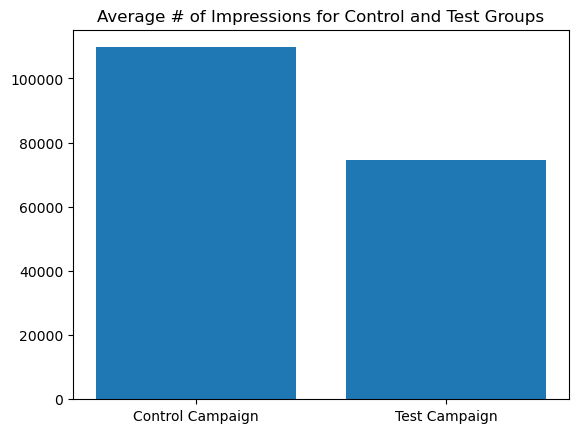

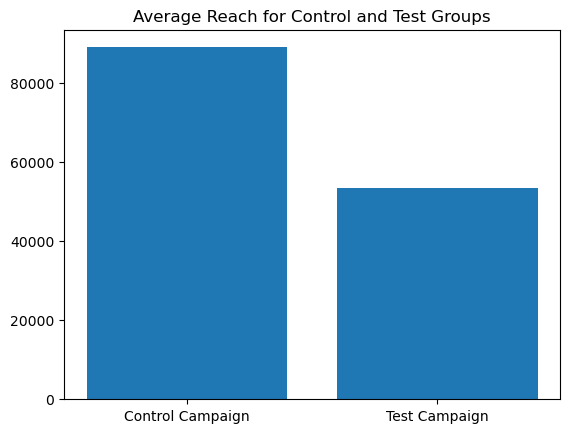

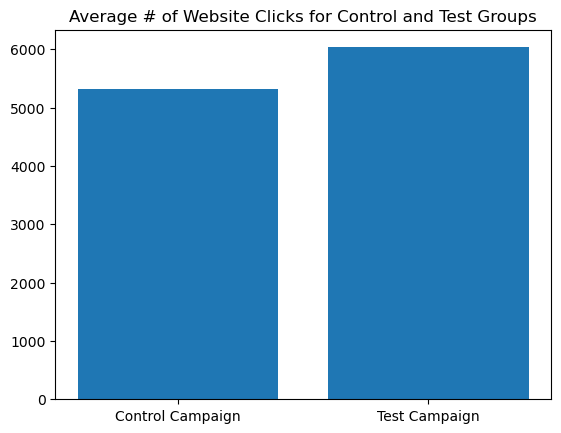

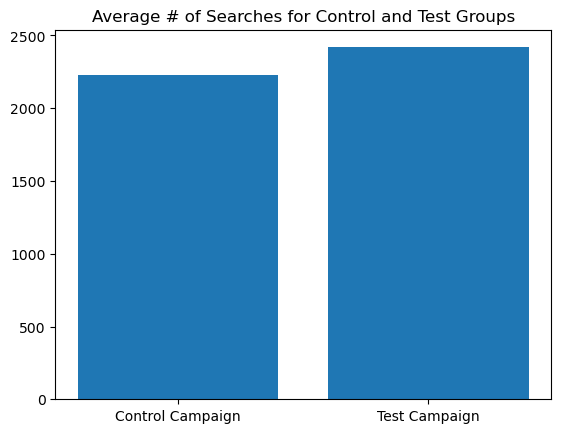

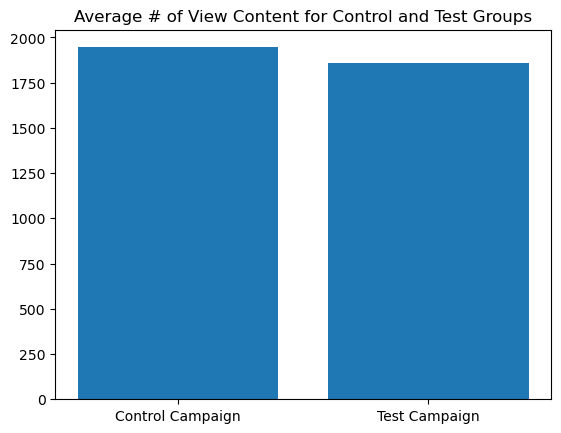

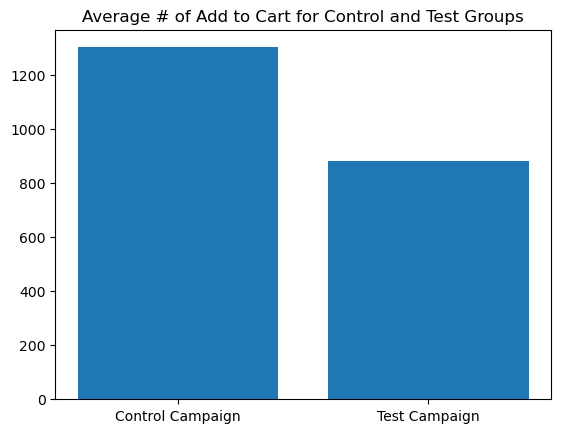

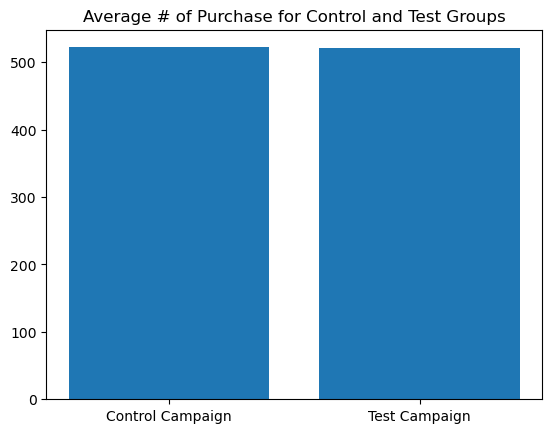

In [24]:
#count graphs
def plot_means(dataframe, group, feature):
    mean_values = (dataframe.groupby(group)[feature].mean()).values
    labels = (dataframe.groupby(group)[feature].mean()).index
    plt.bar(labels, mean_values)
    plt.title(f"Average {feature} for Control and Test Groups")
    plt.show()

my_features = list(joined_df.drop(['Campaign Name', 'Date'], axis=1).columns)

for feature in my_features:
    plot_means(joined_df, 'Campaign Name', feature)


Observations:
- Spend [USD]: Control < Test
- Impressions: Control > Test
- Reach: Control > Test
- Website Clicks: Control < Test
- Searches: Control < Test
- Views: Control > Test
- Add to Cart: Control > Test
- Purchases: Practically identical

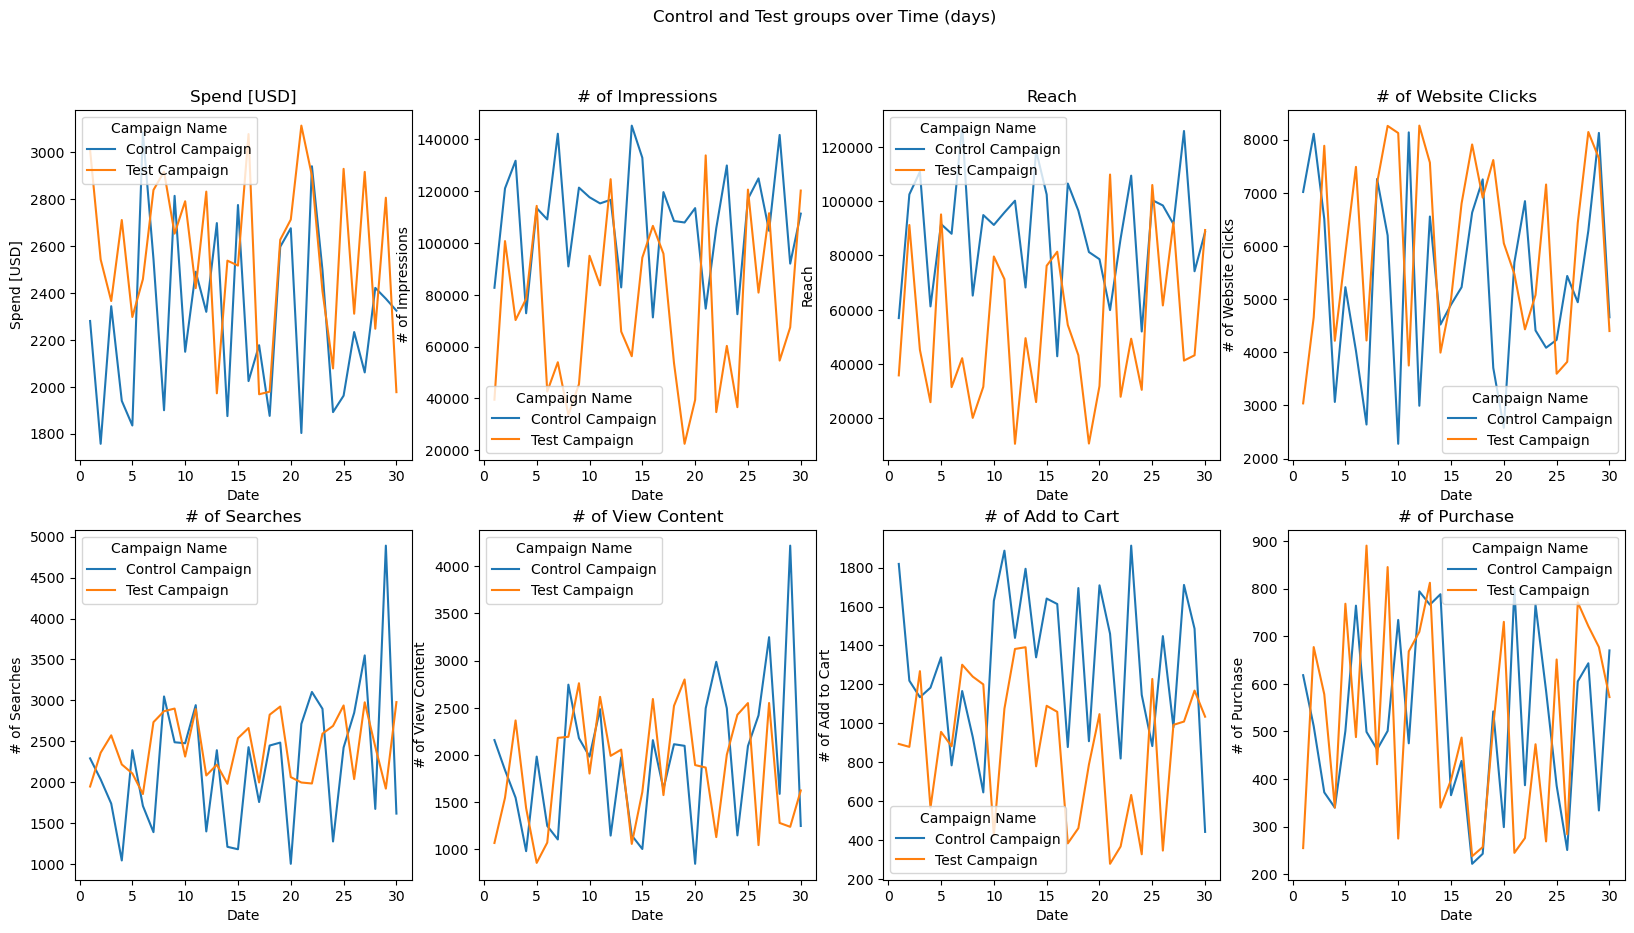

In [57]:
#make subplot
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

#plot features over time (days)
sns.lineplot(x=joined_df['Date'].dt.day, y=joined_df['Spend [USD]'], hue=joined_df['Campaign Name'], ax=axs[0, 0])
axs[0, 0].set_title('Spend [USD]')

sns.lineplot(x=joined_df['Date'].dt.day, y=joined_df['# of Impressions'], hue=joined_df['Campaign Name'], ax=axs[0, 1])
axs[0, 1].set_title('# of Impressions')

sns.lineplot(x=joined_df['Date'].dt.day, y=joined_df['Reach'], hue=joined_df['Campaign Name'], ax=axs[0, 2])
axs[0, 2].set_title('Reach')

sns.lineplot(x=joined_df['Date'].dt.day, y=joined_df['# of Website Clicks'], hue=joined_df['Campaign Name'], ax=axs[0, 3])
axs[0, 3].set_title('# of Website Clicks')

sns.lineplot(x=joined_df['Date'].dt.day, y=joined_df['# of Searches'], hue=joined_df['Campaign Name'], ax=axs[1, 0])
axs[1, 0].set_title('# of Searches')

sns.lineplot(x=joined_df['Date'].dt.day, y=joined_df['# of View Content'], hue=joined_df['Campaign Name'], ax=axs[1, 1])
axs[1, 1].set_title('# of View Content')

sns.lineplot(x=joined_df['Date'].dt.day, y=joined_df['# of Add to Cart'], hue=joined_df['Campaign Name'], ax=axs[1, 2])
axs[1, 2].set_title('# of Add to Cart')

sns.lineplot(x=joined_df['Date'].dt.day, y=joined_df['# of Purchase'], hue=joined_df['Campaign Name'], ax=axs[1, 3])
axs[1, 3].set_title('# of Purchase')

#plot Spend
plt.suptitle('Control and Test groups over Time (days)')
plt.show()

Observations:
- Spend [USD]: Peaks are opposite it appears
- Impressions: A bit sporadic...some match others are opposite
- Reach: similar to impressions
- Website Clicks: almost matching, but some variability
- Searches: Same trend generally, but some opposite
- View Content: Mixture of same and opposite
- Add to Cart: Generally the same trend
- Purchases: Same trend essentially.

# A/B Testing

Metrics:
- Conversion Rate =  # of Purchase/ # Add to cart
- Click-through rate = # of website clicks / # of impressions
- Revenue per visitor = total Spend[USD] / day
- View rate = # of view content / # of Searches 

There are likely more metrics, but these seem like a good start. Don't want to get bogged down in metrics too much right now


In [25]:
#calc conversion rate
control_conversion = (control_copy['# of Purchase'] / control_copy['# of Add to Cart']).values
test_conversion = (test_copy['# of Purchase'] / test_copy['# of Add to Cart']).values

#calc click through rate
control_clicks = (control_copy['# of Website Clicks'] / control_copy['# of Impressions']).values
test_clicks = (test_copy['# of Website Clicks'] / test_copy['# of Impressions']).values

#calc revenue per day
control_revenue = (control_copy['Spend [USD]'] / len(control_copy)).values
test_revenue = (test_copy['Spend [USD]'] / len(test_copy)).values

#calc view rate
control_view = (control_copy['# of View Content'] / control_copy['# of Searches']).values
test_view = (test_copy['# of View Content'] / test_copy['# of Searches']).values

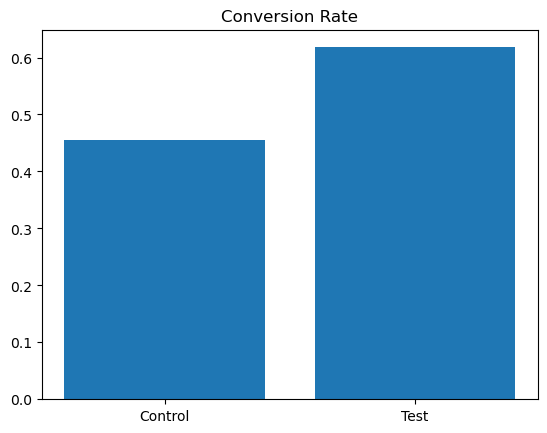

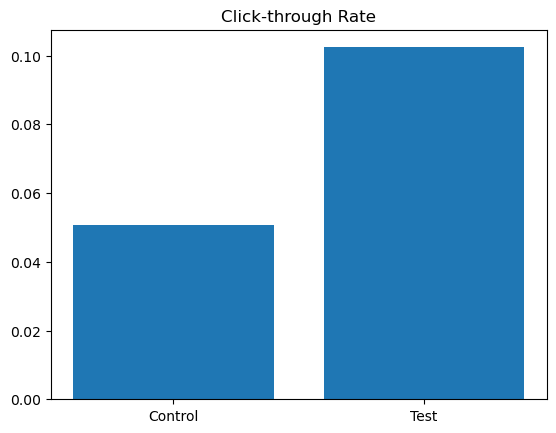

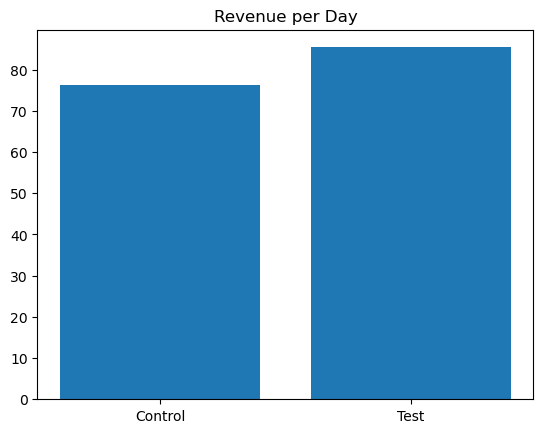

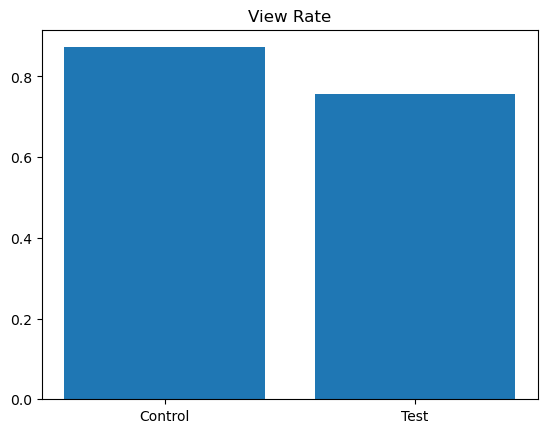

In [29]:
# get means
def get_means(control, test):
    my_means = []
    my_means.append(control.mean())
    my_means.append(test.mean())
    return my_means

def plot_metrics(control, test, labels, title):
    my_means = get_means(control, test)
    plt.bar(labels, my_means)
    plt.title(title)
    plt.show()


#plot Conversion Rate
plot_metrics(control_conversion, test_conversion, ['Control', 'Test'], 'Conversion Rate')

# Plot Click-through Rate
plot_metrics(control_clicks, test_clicks, ['Control', 'Test'], 'Click-through Rate')

# Plot Revenue per Day
plot_metrics(control_revenue, test_revenue, ['Control', 'Test'], 'Revenue per Day')

# Plot View Rate
plot_metrics(control_view, test_view, ['Control', 'Test'], 'View Rate')

Observations:
- Conversion Rate: Control < Test
- Click-through rate: Control < Test
- Revenue per Day: Control < Test
- View Rate: Control > Test

Hypotheses:

Conversion Rate
- H0: The two groups have an equal Conversion rate
- Ha: The two groups do not have an equal conversion rate

Click-through rate
- H0: The two groups have an equal Click-through rate
- Ha: The two groups do not have an equal Click through rate

Revenue per Day
- H0: The two groups have an equal revenue per day
- Ha: The two groups have different revenue per day

View Rate
- H0: The two groups have an equal View rate
- Ha: The two group have different view rates

In [26]:
#function to perform mann whitney test
def mann_whitney(array1, array2, metric):
    stat, pvalue = stats.mannwhitneyu(array1, array2)

    if pvalue < 0.05:
        print(pvalue)
        print(f'Reject H0: The average {metric} differs between the Control and Test group')
    else:
        print(f"Fail to reject Ha: The average {metric} is the same between the Control and Test groups")


mann_whitney(control_conversion, test_conversion, 'Conversion rate')

mann_whitney(control_clicks, test_clicks, 'Click-through Rate')

mann_whitney(control_revenue, test_revenue, 'Revenue per Day')

mann_whitney(control_view, test_view, 'View Rate')

0.00011057725968083765
Reject H0: The average Conversion rate differs between the Control and Test group
0.00018916193602108462
Reject H0: The average Click-through Rate differs between the Control and Test group
0.004427193167173018
Reject H0: The average Revenue per Day differs between the Control and Test group
0.03916706803882588
Reject H0: The average View Rate differs between the Control and Test group


So, it appears the differences are statistically signigicant. 

# Conclusions

Although the data flucuates on a day-day basis, the test campaign had a higher conversion rate, click through rate and more revenue per day.

This indicates the test campaign was better at getting vistors to purchase cart items, to interact, and most importantly generate more revnue per day

There is pause though as the cost between the two campaigns may not be identical, and thus the profit per campaign may be different.

In sum, the Test Campaign appeared to be better at generating revenue and interaction among visitors.
